In [29]:
import os
import glob
import time
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

from hyss_util import *


In [30]:
# -- set mpl defaults
plt.rcParams["image.interpolation"] = "nearest"
plt.rcParams["image.cmap"] = "gist_gray"
plt.rcParams['axes.titlepad'] = 0 

In [3]:
%matplotlib widget

In [3]:
#LOAD THE HYPERSPECTRAL DATA **

In [21]:
imgL_hsi0_half0 = np.load("../output/filtered_hsi0_half0.npy")
imgL_hsi0_half1 = np.load("../output/filtered_hsi0_half1.npy")
hsi0 = np.hstack([imgL_hsi0_half0, imgL_hsi0_half1])

# -- resize hsi0
hsi0_resize = hsi0[:, 238:933, 0:1087]

In [40]:
hsi0_resize.shape

(872, 695, 1087)

In [31]:
# -- plot the selected small area for the 2013 image

rect = (hsi0_resize[:, 360:560, 500:790]).reshape(len(hsi0_resize), (200)* (290))
hsi0_spec_agg = rect.mean(axis=1)
hsi0_spec = (hsi0_spec_agg - hsi0_spec_agg.min()) / (hsi0_spec_agg.max() - hsi0_spec_agg.min())
np.save("../output/aggregate_small_area_2013.npy", hsi0_spec)

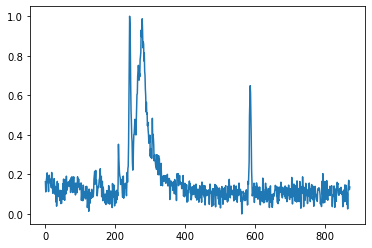

In [23]:
plt.plot(hsi0_spec)

In [32]:
def get_aggre_spec(hsi, x0, x1, y0, y1, x2, x3, y2, y3):
    
    
    """
    Read cleaned hyperspectral image data and create masked aggregate spectrum
    
    Parameters:
    -----------
    
    
    hsi: three dimentionsal array
    cleaned hyperspectral image data
    
    x0, x1, x2, x3, y0, y1, y2, y3: x and y location of masked area
    
    Returns:
    --------
    hsi: masked hyperspectral image data 
    
    hsi_spec_agg: the aggregated spec
      
    """
    # -- set up row/col grid
    cc, rr = np.meshgrid(range(hsi.shape[2]), range(hsi.shape[1]))

    # -- get pixels for patch
    pchs = [[y0, x0, y1, x1], 
        [y2, x2, y3, x3]]

    # -- make the patches
    pval = -9999
    for pch in pchs:
        pind = (rr >= pch[0]) & (rr < pch[2]) & (cc >= pch[1]) & (cc < pch[3]) 
        hsi[:, pind] = pval
        
    # -- get aggregate spectrum
    gind = hsi[0] != pval
    hsi_spec_agg = hsi[:, gind].mean(axis=1)
    hsi_spec_agg = (hsi_spec_agg - hsi_spec_agg.min()) / (hsi_spec_agg.max() - hsi_spec_agg.min())
    
    return hsi, hsi_spec_agg

In [33]:
hsi0, aggre_no_new = get_aggre_spec(hsi0_resize, 320, 475, 320, 695, 130, 225, 165, 400)


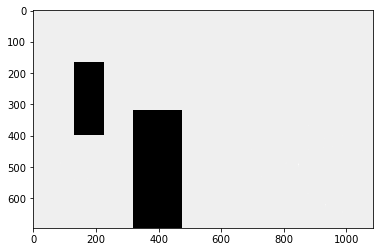

In [34]:
fig, ax = plt.subplots(figsize = (12, 4))
plt.imshow(hsi0.mean(axis=0))

In [35]:
# -- load waves range for both scans
waves0 = np.load("../output/graham_hall_upload/cube0_waves_range.npy")
waves1 = np.load("../output/graham_hall_upload/cube1_waves_range.npy")

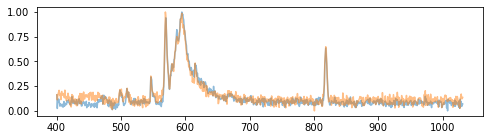

In [36]:
fig, ax = plt.subplots(figsize = (8, 2))
ax.plot(waves0, aggre_no_new, alpha = 0.5)
ax.plot(waves0, hsi0_spec, alpha = 0.5)

In [47]:
np.save("../output/aggregate_no_constructions_2013.npy", aggre_no_new)

In [37]:
imgL_hsi1_half0 = np.load("../output/filtered_hsi1_half0.npy")
imgL_hsi1_half1 = np.load("../output/filtered_hsi1_half1.npy")
hsi1 = np.hstack([imgL_hsi1_half0, imgL_hsi1_half1])

In [6]:
from scipy.ndimage import zoom


In [38]:
img_L1_rs = zoom(hsi1, np.divide((848, 695, 1252), (848, 1600, 3195)), order = 1)
img_L1 = img_L1_rs[:, :, 165:1252]

In [39]:
img_L1.shape

(848, 695, 1087)

In [42]:
rect2 = (img_L1[:, 360:560, 500:790]).reshape(len(img_L1), (200)* (290))
rect2.shape
hsi1_spec_agg = rect2.mean(axis=1)
hsi1_spec = (hsi1_spec_agg - hsi1_spec_agg.min()) / (hsi1_spec_agg.max() - hsi1_spec_agg.min())

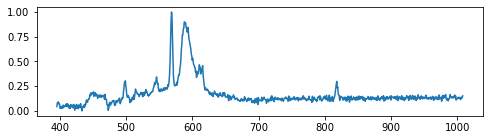

In [44]:
fig, ax = plt.subplots(figsize = (8, 2))
ax.plot(waves1, hsi1_spec)


In [45]:
np.save("../output/aggregate_small_area_2018.npy", hsi1_spec)

In [46]:
hsi1, aggre_no_new = get_aggre_spec(img_L1_rs, 320, 475, 320, 695, 130, 225, 165, 400)


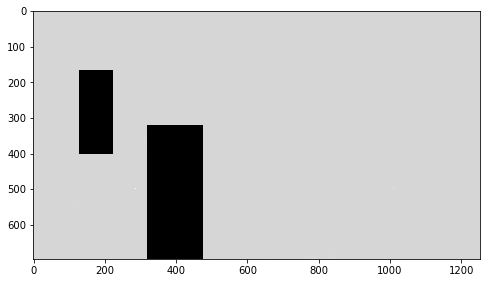

In [47]:
fig, ax = plt.subplots(figsize = (8, 8))
plt.imshow(hsi1.mean(axis=0))

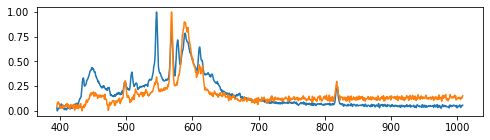

In [48]:
fig, ax = plt.subplots(figsize = (8, 2))
ax.plot(waves1, aggre_no_new)
ax.plot(waves1, hsi1_spec)


In [105]:
np.save("../output/aggregate_no_constructions_2018.npy", aggre_no_new)